In [1]:
result <- dget( file = "RL_3.2.4.txt")


In [2]:
k = 1
N=50
times=50
x_test <- seq(-pi, pi, length.out = N) 
y_test <- cos(seq(-pi, pi, length.out = N) * k)^3

method_colors <- c("red", "green", "blue") 

y_min <- min(y_test)
y_max <- max(y_test)


  matrices_prediction_1 <- lapply(1:N, function(x) matrix(0, nrow = times, ncol = 3))
  matrices_prediction_2 <- lapply(1:N, function(x) matrix(0, nrow = times, ncol = 3))
  matrices_prediction_rl <- lapply(1:N, function(x) matrix(0, nrow = times, ncol = 3))

for (i in 1:times){
   for (j in 1:N){
       matrices_prediction_1[[j]][i,]<- result[["matrices_prediction_new_1"]][[i]][j,]
       matrices_prediction_2[[j]][i,]<- result[["matrices_prediction_new_2"]][[i]][j,]
       matrices_prediction_rl[[j]][i,]<- result[["matrices_prediction_new_rl"]][[i]][j,]
    }
    }

  mean_1 <- matrix(ncol = 3, nrow = N)
  mean_2 <- matrix(ncol = 3, nrow = N)
  mean_rl <- matrix(ncol = 3, nrow = N)

  for (k in 1:N){
    mean_1[k,] <- apply(matrices_prediction_1[[k]], 2, mean)
    mean_2[k,] <- apply(matrices_prediction_2[[k]], 2, mean)
    mean_rl[k,] <- apply(matrices_prediction_rl[[k]], 2, mean)
  }
                                   
confidence_intervals_1 <- matrix(ncol = 3, nrow = N)
confidence_intervals_2 <- matrix(ncol = 3, nrow = N)  
confidence_intervals_rl <- matrix(ncol = 3, nrow = N)  

  for (j in 1:3){ 
confidence_intervals_rl[,j] <- sqrt(result[["variance_rl"]][,j]) * 1.96
confidence_intervals_1[,j] <- sqrt(result[["variance_1"]][,j]) * 1.96
confidence_intervals_2[,j] <- sqrt(result[["variance_2"]][,j]) * 1.96         
      }



In [3]:
  q_l_1 <- matrix(ncol = 3, nrow = N)
  q_l_2 <- matrix(ncol = 3, nrow = N)
  q_l_rl <- matrix(ncol = 3, nrow = N)

  for (k in 1:N){
    q_l_1[k,] <- apply(matrices_prediction_1[[k]], 2, quantile, probs = 0.025)
    q_l_2[k,] <- apply(matrices_prediction_2[[k]], 2, quantile, probs = 0.025)
    q_l_rl[k,] <- apply(matrices_prediction_rl[[k]], 2, quantile, probs = 0.025)
  }


  q_u_1 <- matrix(ncol = 3, nrow = N)
  q_u_2 <- matrix(ncol = 3, nrow = N)
  q_u_rl <- matrix(ncol = 3, nrow = N)

  for (k in 1:N){
    q_u_1[k,] <- apply(matrices_prediction_1[[k]], 2, quantile, probs = 0.975)
    q_u_2[k,] <- apply(matrices_prediction_2[[k]], 2, quantile, probs = 0.975)
    q_u_rl[k,] <- apply(matrices_prediction_rl[[k]], 2, quantile, probs = 0.975)
  }

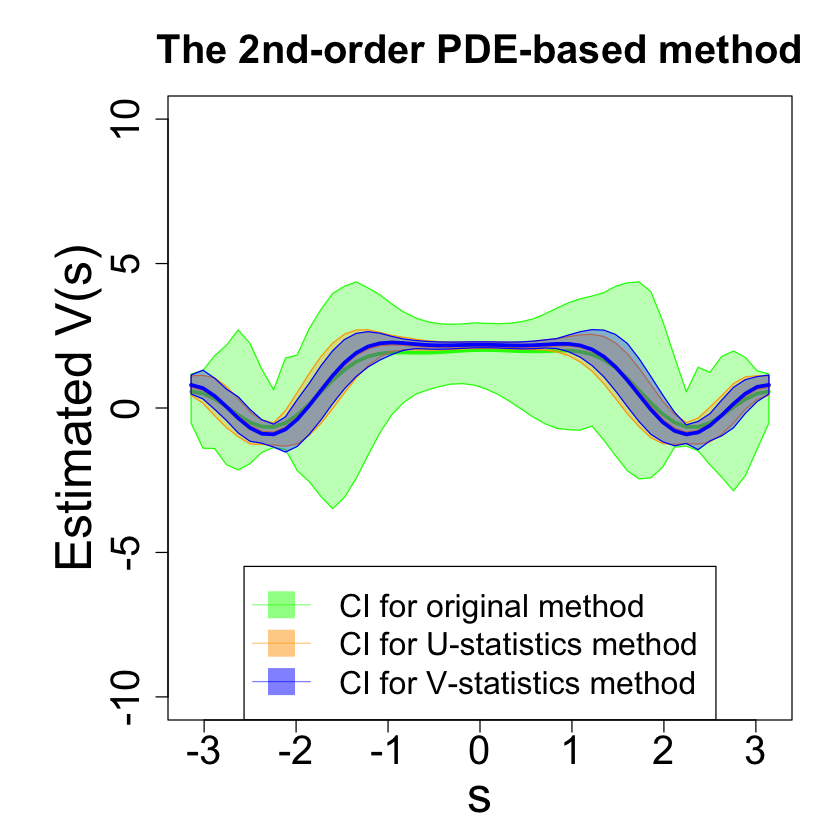

In [4]:
method_colors <- c("green", "orange", "blue")
par(mar = c(5, 7, 4, 2))  

method_colors <- c("green", "orange", "blue")  

plot(x_test, y_test, type = "n", col = "black", lwd=2,
     xlab = "s", ylab = "Estimated V(s)",
     main = "The 2nd-order PDE-based method",
     ylim = c(-10, 10),
     cex.main = 2, 
     cex.lab = 2.5,  
     cex.axis = 2  
     )


for (j in 1:3) {
  lines(x_test, mean_2[,j], col = method_colors[j], lty = 1, lwd=3)
  
  polygon(c(x_test, rev(x_test)),
            c(q_u_2[,j],
            rev(q_l_2[,j])),
          col = adjustcolor(method_colors[j], alpha.f = 0.3),  border = method_colors[j])
}

legend("bottom", 
       legend = c(
                  "CI for original method", 
                  "CI for U-statistics method", 
                  "CI for V-statistics method"), 
       col = c(adjustcolor(method_colors, alpha.f = 0.5)), 
       lty = c(1, 1, 1), 
       pch = c(15, 15, 15), 
       pt.cex = 3, 
       cex = 1.6,  
       box.lty = 1)  